# machine learning

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from subprocess import check_output

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Change to your directory here
# train.json and test.json are expected in this folder
DATA_PATH = 'S:\A_SEMESTER_3\DAB_300_MACHINE LEARNING 2\PROJECT\data'
TRAIN_PATH = DATA_PATH + "train.json"
TEST_PATH  = DATA_PATH + "test.json"

In [2]:
import json

In [7]:
#Loading train and test data from JSON file

train_data = pd.read_json('S:\A_SEMESTER_3\DAB_300_MACHINE LEARNING 2\PROJECT\data/train.json', orient='records')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB


In [9]:
train_data.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [10]:
len(train_data)

1604

In [11]:
train_data.band_1

0       [-27.878360999999998, -27.15416, -28.668615, -...
1       [-12.242375, -14.920304999999999, -14.920363, ...
2       [-24.603676, -24.603714, -24.871029, -23.15277...
3       [-22.454607, -23.082819, -23.998013, -23.99805...
4       [-26.006956, -23.164886, -23.164886, -26.89116...
                              ...                        
1599    [-30.999878, -29.976866, -28.233906, -29.50732...
1600    [-25.31155, -26.511555, -28.694487, -27.180115...
1601    [-18.141895, -18.141844, -19.01737, -19.701599...
1602    [-22.455633, -25.794661, -26.954567, -22.83354...
1603    [-19.909191, -20.678406, -20.208834, -18.42441...
Name: band_1, Length: 1604, dtype: object

In [3]:
test_data = pd.read_json('S:\A_SEMESTER_3\DAB_300_MACHINE LEARNING 2\PROJECT\data/test.json', orient='records')

In [4]:
test_data.info

<bound method DataFrame.info of             id                                             band_1  \
0     5941774d  [-15.863251, -15.201077, -17.887735, -19.17248...   
1     4023181e  [-26.058969497680664, -26.058969497680664, -26...   
2     b20200e4  [-14.14109992980957, -15.064241409301758, -17....   
3     e7f018bb  [-12.167478, -13.706167, -16.54837, -13.572674...   
4     4371c8c3  [-23.37459373474121, -26.02718162536621, -28.1...   
...        ...                                                ...   
8419  16ee9b50  [-25.082357, -26.71583, -24.599827, -25.082571...   
8420  5a599eb7  [-21.031391143798828, -21.031391143798828, -21...   
8421  df30d6dd  [-28.609278, -26.514626, -26.514679, -26.83061...   
8422  18af95b1  [-27.068821, -27.068892, -23.970854, -22.38730...   
8423  27d788c8  [-25.438865661621094, -25.438865661621094, -25...   

                                                 band_2  inc_angle  
0     [-21.629612, -21.142353, -23.908337, -28.34524...  34.966400  
1

In [5]:
test_data.describe()

,inc_angle
count,8424.000000
mean,40.153403
std,4.108386
min,23.080500
25%,36.905200
50%,40.375790
75%,43.472950
max,50.661785


In [6]:
test_data.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [12]:
print("Train Information\n")
train_data.info()
print("\nTest Information\n")
test_data.info()


Train Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB

Test Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8424 non-null   object 
 1   band_1     8424 non-null   object 
 2   band_2     8424 non-null   object 
 3   inc_angle  8424 non-null   float64
dtypes: float64(1), object(3)
memory usage: 263.4+ KB


In [13]:
print("Train Records")
train_data.head()

Train Records


,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [15]:
train= train_data
test=test_data

In [44]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [45]:
X_band_1.shape

(1604, 75, 75)

In [46]:
X_band_2.shape

(1604, 75, 75)

In [47]:
X_train.shape

(1604, 75, 75, 3)

In [48]:
X_band_test_1.shape

(8424, 75, 75)

In [49]:
X_band_test_2.shape

(8424, 75, 75)

In [50]:
X_test.shape

(8424, 75, 75, 3)

In [26]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools


In [28]:
py.init_notebook_mode(connected=True)

In [34]:
def plot_contour_2d(band1, band2, label):
    fig = tools.make_subplots(rows=1, cols=2,  specs=[[{'is_3d': True}, {'is_3d': True}]])
    fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu',
                          scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', z=band2, colorscale='RdBu',
                          scene='scene2', showscale=False), 1, 2)


    fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)

    py.iplot(fig)

    fig, ax = plt.subplots(1, 2, figsize=(16, 10))
    ax[0].imshow(X_band_1[num, :, :])
    ax[0].set_title('Image from band_1', fontsize=15)
    ax[1].imshow(X_band_2[num, :, :])
    ax[1].set_title('Image from band_2', fontsize=15)
    plt.show()


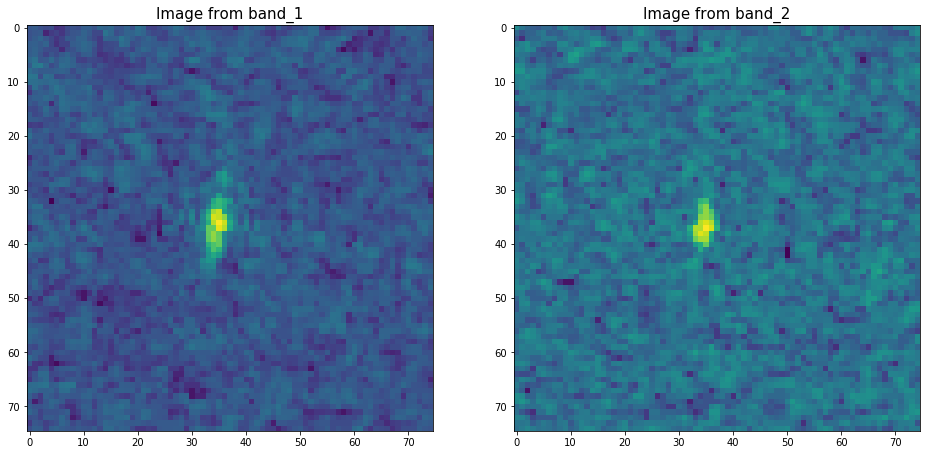

In [35]:
num = 0
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)


C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



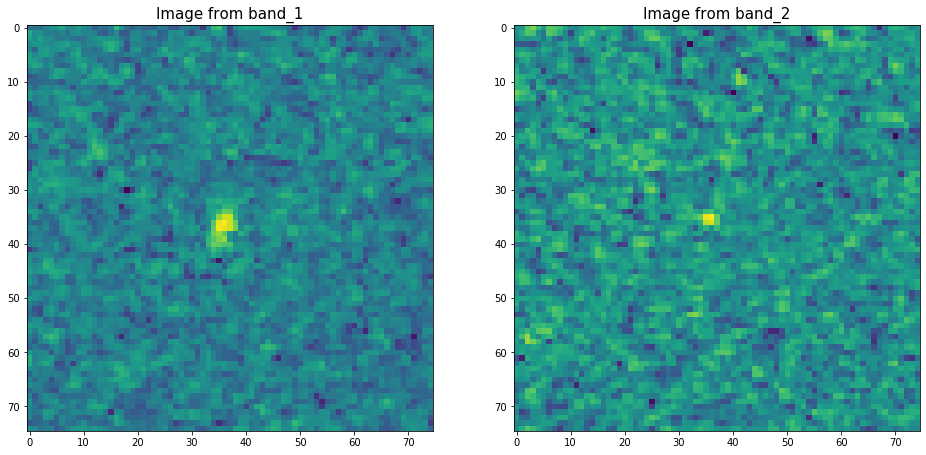

In [31]:
num = 2
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)

# Model BUilding

In [36]:
#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

Using TensorFlow backend.


# Defining our model

In [37]:
#define our model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel

In [39]:
gmodel=getModel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [51]:
target_train=train['is_iceberg']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target_train, random_state=361, test_size=0.2)

In [52]:
gmodel.fit(X_train, y_train,
          batch_size=24,
          epochs=10,
          verbose=1,
          validation_data=(X_valid, y_valid)
          )

Train on 1283 samples, validate on 321 samples
Epoch 1/10
1283/1283 [==============================] - 33s 26ms/step - loss: 0.8559 - accuracy: 0.5284 - val_loss: 0.6078 - val_accuracy: 0.6854
Epoch 2/10
1283/1283 [==============================] - 29s 22ms/step - loss: 0.5616 - accuracy: 0.6758 - val_loss: 0.5556 - val_accuracy: 0.7072
Epoch 3/10
1283/1283 [==============================] - 26s 20ms/step - loss: 0.5286 - accuracy: 0.6991 - val_loss: 0.5262 - val_accuracy: 0.7259
Epoch 4/10
1283/1283 [==============================] - 25s 20ms/step - loss: 0.4632 - accuracy: 0.7646 - val_loss: 0.4359 - val_accuracy: 0.8224
Epoch 5/10
1283/1283 [==============================] - 25s 19ms/step - loss: 0.4353 - accuracy: 0.7872 - val_loss: 0.4017 - val_accuracy: 0.8255
Epoch 6/10
1283/1283 [==============================] - 26s 20ms/step - loss: 0.4485 - accuracy: 0.7708 - val_loss: 0.4384 - val_accuracy: 0.8318
Epoch 7/10
1283/1283 [==============================] - 29s 22ms/step - loss:

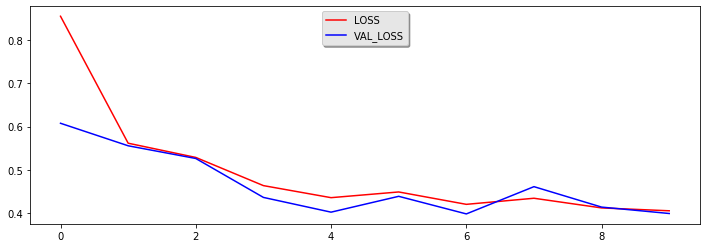

In [56]:
#plotting the graphs for loss and validation loss
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(gmodel.history.history['loss'], color='red', label='LOSS')
plt.plot(gmodel.history.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

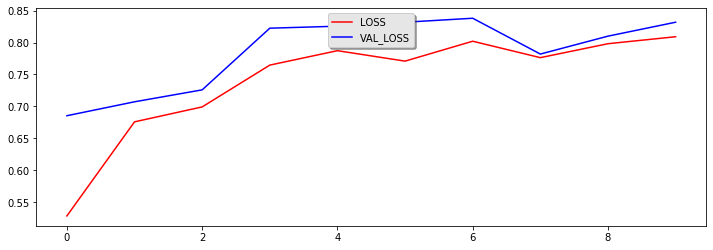

In [57]:
#plotting the graphs for accuracy and validation accuracy
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(gmodel.history.history['accuracy'], color='red', label='LOSS')
plt.plot(gmodel.history.history['val_accuracy'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [58]:
score = gmodel.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

321/321 [==============================] - 1s 4ms/step
Test loss: 0.3986125370238058
Test accuracy: 0.8317757248878479


In [59]:
predicted_test = gmodel.predict_proba(X_test)

In [60]:
submission = pd.DataFrame()
submission['id']=test['id']
submission['is_iceberg']=predicted_test.reshape((predicted_test.shape[0]))
submission.to_csv('sub.csv', index=False)

In [62]:
submission

,id,is_iceberg
0,5941774d,5.512181e-01
1,4023181e,6.440779e-01
2,b20200e4,9.345431e-01
3,e7f018bb,8.048859e-01
4,4371c8c3,2.276693e-01
...,...,...
8419,16ee9b50,4.600382e-13
8420,5a599eb7,4.093841e-01
8421,df30d6dd,2.950361e-01
8422,18af95b1,9.688888e-01


# Implementation number 2

# Model using adding other feature : Inc_angle

Iceberg::Band-1


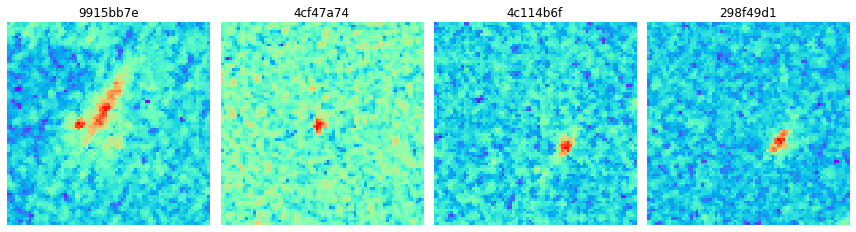

Iceberg::Band-2


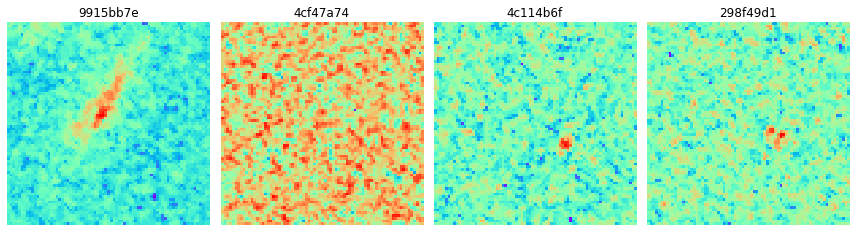

Ship::Band-1


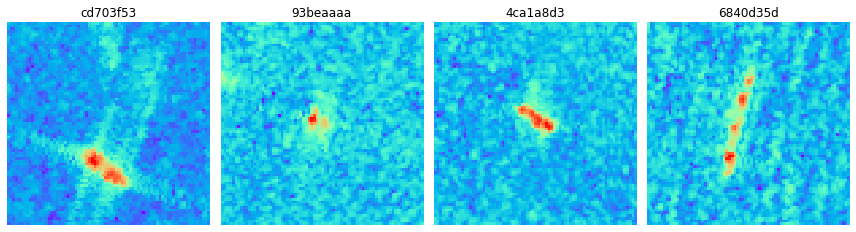

Ship::Band-2


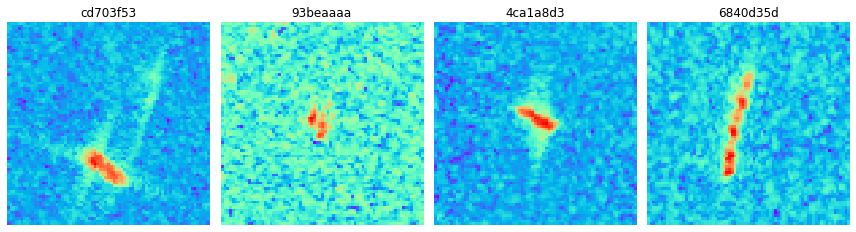

In [63]:
def draw_sample(sample, ncols=4, titles=None):
    nrows = np.ceil(1. * len(sample) / ncols)    
    plt.figure(figsize=(12, 4 * nrows))
    for j, img_raw in enumerate(sample):
        img = np.reshape(img_raw, (75,75))
        plt.subplot(nrows, ncols, j+1)
        plt.imshow(img, cmap='rainbow')
        if titles: plt.title(titles[j])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
sample_icebergs = train[train['is_iceberg'] == 1].sample(4)
sample_ships = train[train['is_iceberg'] == 0].sample(4)
print("Iceberg::Band-1")
draw_sample(sample_icebergs['band_1'], titles=sample_icebergs['id'].tolist())
print("Iceberg::Band-2")
draw_sample(sample_icebergs['band_2'], titles=sample_icebergs['id'].tolist())
print("Ship::Band-1")
draw_sample(sample_ships['band_1'], titles=sample_ships['id'].tolist())
print("Ship::Band-2")
draw_sample(sample_ships['band_2'], titles=sample_ships['id'].tolist())


In [64]:
train.inc_angle = train.inc_angle.replace('na', 0)
train.inc_angle = train.inc_angle.astype(float).fillna(0.0)

In [72]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [75]:
# Train data
#x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
#x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
#X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          #, x_band2[:, :, :, np.newaxis]
                         #, ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
X_angle_train = np.array(train.inc_angle)
y_train = np.array(train["is_iceberg"])

# Test data
#x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
#x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
#X_test = np.concatenate([x_band1[:, :, :, np.newaxis]
                         ## , x_band2[:, :, :, np.newaxis]
                         #, ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
X_angle_test = np.array(test.inc_angle)


#X_train, X_valid, X_angle_train, X_angle_valid, y_train, y_valid = train_test_split(X_train
                    #, X_angle_train, y_train, random_state=361, test_size=0.33)

In [76]:
X_angle_train.shape

(1604,)

In [77]:
X_train.shape

(1604, 75, 75, 3)

In [78]:
y_train.shape

(1604,)

In [79]:
X_angle_test.shape

(8424,)

In [80]:

X_train, X_valid, X_angle_train, X_angle_valid, y_train, y_valid = train_test_split(X_train
                    , X_angle_train, y_train, random_state=361, test_size=0.2)

# Creation of Model

In [81]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
    
def get_model():
    bn_model = 0
    p_activation = "elu"
    input_1 = Input(shape=(75, 75, 3), name="X_1")
    input_2 = Input(shape=[1], name="angle")
    
    img_1 = Conv2D(16, kernel_size = (3,3), activation=p_activation) ((BatchNormalization(momentum=bn_model))(input_1))
    img_1 = Conv2D(16, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    
    img_1 = Conv2D(32, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = Conv2D(32, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    
    img_1 = Conv2D(128, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    img_1 = GlobalMaxPooling2D() (img_1)
    
    
    img_2 = Conv2D(128, kernel_size = (3,3), activation=p_activation) ((BatchNormalization(momentum=bn_model))(input_1))
    img_2 = MaxPooling2D((2,2)) (img_2)
    img_2 = Dropout(0.2)(img_2)
    img_2 = GlobalMaxPooling2D() (img_2)
    
    img_concat =  (Concatenate()([img_1, img_2, BatchNormalization(momentum=bn_model)(input_2)]))
    
    dense_ayer = Dropout(0.5) (BatchNormalization(momentum=bn_model) ( Dense(256, activation=p_activation)(img_concat) ))
    dense_ayer = Dropout(0.5) (BatchNormalization(momentum=bn_model) ( Dense(64, activation=p_activation)(dense_ayer) ))
    output = Dense(1, activation="sigmoid")(dense_ayer)
    
    model = Model([input_1,input_2],  output)
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
model = get_model()
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_1 (InputLayer)                (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 75, 75, 3)    12          X_1[0][0]                        
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 73, 73, 16)   448         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 71, 71, 16)   2320        conv2d_5[0][0]                   
____________________________________________________________________________________________

In [82]:
#using epochs as 20 
model = get_model()
timeline = model.fit([X_train, X_angle_train], y_train, epochs=20
          , validation_data=([X_valid, X_angle_valid], y_valid))

Train on 1283 samples, validate on 321 samples
Epoch 1/20
1283/1283 [==============================] - 31s 24ms/step - loss: 0.6705 - accuracy: 0.6750 - val_loss: 2.8939 - val_accuracy: 0.6729
Epoch 2/20
1283/1283 [==============================] - 26s 21ms/step - loss: 0.5449 - accuracy: 0.7638 - val_loss: 1.0119 - val_accuracy: 0.8380
Epoch 3/20
1283/1283 [==============================] - 26s 20ms/step - loss: 0.4512 - accuracy: 0.7981 - val_loss: 1.6201 - val_accuracy: 0.7819
Epoch 4/20
1283/1283 [==============================] - 30s 23ms/step - loss: 0.3705 - accuracy: 0.8355 - val_loss: 0.5760 - val_accuracy: 0.8349
Epoch 5/20
1283/1283 [==============================] - 32s 25ms/step - loss: 0.3539 - accuracy: 0.8441 - val_loss: 3.9106 - val_accuracy: 0.5670
Epoch 6/20
1283/1283 [==============================] - 31s 24ms/step - loss: 0.3089 - accuracy: 0.8566 - val_loss: 1.0000 - val_accuracy: 0.7788
Epoch 7/20
1283/1283 [==============================] - 29s 22ms/step - loss:

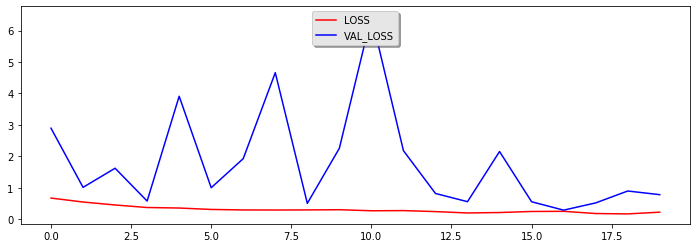

In [83]:
#plotting the results
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(timeline.history['loss'], color='red', label='LOSS')
plt.plot(timeline.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [ ]:
#increaisng batch size to 400

#model.load_weights(filepath=file_path)

print("Evaluate Train Dataset:")
print(model.evaluate([X_train, X_angle_train], y_train, verbose=1, batch_size=400))
print("Evalute Valid Dataset:")
print(model.evaluate([X_valid, X_angle_valid], y_valid, verbose=1, batch_size=400))

In [ ]:
#predicting the model

prediction = model.predict([X_test, X_angle_test], verbose=1, batch_size=200)
prediction

In [ ]:
submission = pd.DataFrame({'id': test["id"], 'is_iceberg': prediction.reshape((prediction.shape[0]))})
submission

# previous executions

In [20]:



#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
#callbacks = get_callbacks(filepath=file_path, patience=5)
#checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True)
#earlystopping = EarlyStopping(patience=10, monitor='loss')
#plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15)


model = get_model()
timeline = model.fit([X_train, X_angle_train], y_train, epochs=10
          , validation_data=([X_valid, X_angle_valid], y_valid))

Train on 1074 samples, validate on 530 samples
Epoch 1/10
1074/1074 [==============================] - 24s 22ms/step - loss: 0.6900 - accuracy: 0.6583 - val_loss: 0.4343 - val_accuracy: 0.8208
Epoch 2/10
1074/1074 [==============================] - 23s 21ms/step - loss: 0.5113 - accuracy: 0.7775 - val_loss: 0.5465 - val_accuracy: 0.7472
Epoch 3/10
1074/1074 [==============================] - 23s 21ms/step - loss: 0.4682 - accuracy: 0.7989 - val_loss: 0.4085 - val_accuracy: 0.8377
Epoch 4/10
1074/1074 [==============================] - 25s 24ms/step - loss: 0.3505 - accuracy: 0.8454 - val_loss: 0.3587 - val_accuracy: 0.8472
Epoch 5/10
1074/1074 [==============================] - 24s 22ms/step - loss: 0.3271 - accuracy: 0.8557 - val_loss: 0.4221 - val_accuracy: 0.8132
Epoch 6/10
1074/1074 [==============================] - 24s 22ms/step - loss: 0.3209 - accuracy: 0.8622 - val_loss: 0.3972 - val_accuracy: 0.8396
Epoch 7/10
1074/1074 [==============================] - 23s 21ms/step - loss:

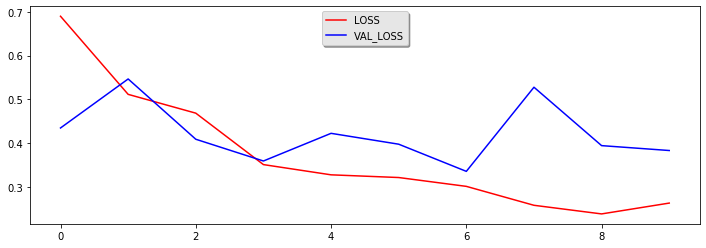

In [22]:
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(timeline.history['loss'], color='red', label='LOSS')
plt.plot(timeline.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [22]:
#model.load_weights(filepath=file_path)

print("Evaluate Train Dataset:")
print(model.evaluate([X_train, X_angle_train], y_train, verbose=1, batch_size=200))
print("Evalute Valid Dataset:")
print(model.evaluate([X_valid, X_angle_valid], y_valid, verbose=1, batch_size=200))

Evaluate Train Dataset:
1074/1074 [==============================] - 5s 4ms/step
[0.07333529238316822, 0.9757914543151855]
Evalute Valid Dataset:
530/530 [==============================] - 2s 4ms/step
[0.3922685440981163, 0.8679245114326477]


In [23]:
prediction = model.predict([X_test, X_angle_test], verbose=1, batch_size=200)

8424/8424 [==============================] - 47s 6ms/step


In [25]:
prediction

array([[3.7011356e-04],
       [7.8290812e-04],
       [8.9639070e-06],
       ...,
       [1.9990428e-01],
       [9.9730313e-01],
       [1.4107121e-06]], dtype=float32)

In [26]:
submission = pd.DataFrame({'id': test["id"], 'is_iceberg': prediction.reshape((prediction.shape[0]))})
submission

,id,is_iceberg
0,5941774d,0.000370
1,4023181e,0.000783
2,b20200e4,0.000009
3,e7f018bb,0.895487
4,4371c8c3,0.147852
...,...,...
8419,16ee9b50,0.001166
8420,5a599eb7,0.000529
8421,df30d6dd,0.199904
8422,18af95b1,0.997303


# Implementing VGG16 Model

In [87]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [88]:
X_angle_train = np.array(train.inc_angle)
y_train = np.array(train["is_iceberg"])
X_angle_test = np.array(test.inc_angle)

In [90]:

X_train, X_valid, X_angle_train, X_angle_valid, y_train, y_valid = train_test_split(X_train
                    , X_angle_train, y_train, random_state=361, test_size=0.2)

In [95]:
bsize=32
num_train_sample=len(X_train)
num_test_sample=len(X_valid)

input_shape1=X_train[0].shape
input_shape2=X_angle_train.shape

print(num_train_sample)
print(num_test_sample)

print(input_shape1)
print(input_shape2)

1283
321
(75, 75, 3)
(1283,)


In [97]:
from keras.layers import Dense,Dropout,Input,GlobalAveragePooling2D,MaxPooling2D,Add,concatenate


In [91]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [92]:
from keras.losses import categorical_crossentropy,binary_crossentropy

In [98]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape=input_shape1)

x1 = base_model.output

x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)

input2=Input(shape=(1,))
x2=Dense(512,activation='relu')(input2)

added = Add()([x1, x2])

x=Dense(512, activation='relu')(added)
x=Dropout(0.2)(x)
x=Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

#The model we will train
    
model = Model(inputs = [base_model.input,input2], outputs = predictions)



#Compile with Adam
model.compile(Adam(lr=.001), loss='binary_crossentropy', metrics=['accuracy'])






In [99]:

 history=model.fit([X_train,X_angle_train],y_train,batch_size=bsize,epochs=10,verbose=1,
                   validation_data=([X_valid,X_angle_valid],y_valid))

Train on 1283 samples, validate on 321 samples
Epoch 1/10
1283/1283 [==============================] - 180s 140ms/step - loss: 1.4731 - accuracy: 0.5433 - val_loss: 1.0365 - val_accuracy: 0.5078
Epoch 2/10
1283/1283 [==============================] - 176s 137ms/step - loss: 0.6142 - accuracy: 0.6610 - val_loss: 0.5373 - val_accuracy: 0.7414
Epoch 3/10
1283/1283 [==============================] - 191s 149ms/step - loss: 0.4362 - accuracy: 0.7919 - val_loss: 0.4468 - val_accuracy: 0.8723
Epoch 4/10
1283/1283 [==============================] - 195s 152ms/step - loss: 0.6751 - accuracy: 0.5690 - val_loss: 0.6276 - val_accuracy: 0.5826
Epoch 5/10
1283/1283 [==============================] - 194s 151ms/step - loss: 0.6423 - accuracy: 0.5542 - val_loss: 0.6281 - val_accuracy: 0.5826
Epoch 6/10
1283/1283 [==============================] - 192s 150ms/step - loss: 0.6520 - accuracy: 0.5386 - val_loss: 0.6397 - val_accuracy: 0.5078
Epoch 7/10
1283/1283 [==============================] - 199s 155m

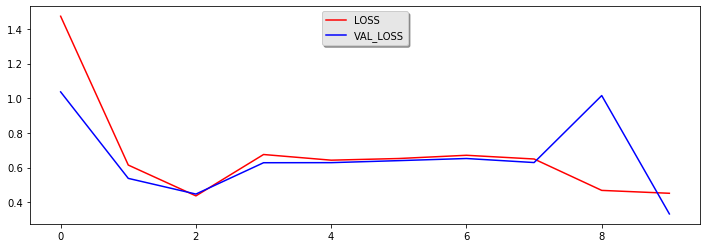

In [100]:
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(history.history['loss'], color='red', label='LOSS')
plt.plot(history.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

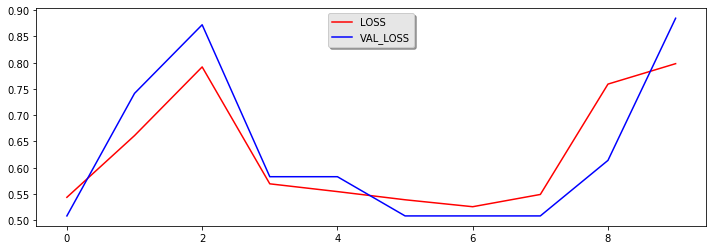

In [101]:
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(history.history['accuracy'], color='red', label='LOSS')
plt.plot(history.history['val_accuracy'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [102]:
sub_prediction = model.predict([X_test, X_angle_test], verbose=1, batch_size=200)

8424/8424 [==============================] - 250s 30ms/step


In [103]:
sub_prediction.shape

(8424, 1)

In [104]:
submission = pd.DataFrame({'id': test["id"], 'is_iceberg': sub_prediction.reshape((sub_prediction.shape[0]))})
submission.head(10)

,id,is_iceberg
0,5941774d,6.879827e-01
1,4023181e,2.258182e-01
2,b20200e4,0.000000e+00
3,e7f018bb,6.922884e-01
4,4371c8c3,1.452868e-02
5,a8d9b1fd,7.238008e-10
6,29e7727e,1.200121e-01
7,92a51ffb,6.887878e-01
8,c769ac97,4.848048e-13
9,aee0547d,0.000000e+00


In [106]:
submission.to_csv("sub2.csv", index=False)